In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import torch
import torch.nn as nn

In [2]:
test_data = pd.read_csv('test_clean.csv')
train_data = pd.read_csv('train_clean.csv')


In [3]:
from gensim.models import word2vec, FastText
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')
from gensim.models.word2vec import Word2Vec



import gensim
import numpy as np
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import gensim.downloader as api
from gensim.models import KeyedVectors
from gensim.models.word2vec import Word2Vec

df = train_data
from itertools import islice

In [6]:
train_data_sample = train_data
sample_1_list = (train_data_sample['text']).tolist()

sentences = sample_1_list


In [7]:

for i, sentence in enumerate(sentences):
    #sentence = sentence.strip('.,();:')
    sentence = sentence.replace(',','')
    sentence = sentence.replace('.','')
    sentence = sentence.replace('(','')
    sentence = sentence.replace(')','')
    sentence = sentence.replace(';','')
    sentence = sentence.replace(':','')
    sentence = sentence.split()
    
    sentences[i] = sentence
    

In [8]:
w2v = Word2Vec(sentences, min_count=1, vector_size = 5)

print(w2v)

Word2Vec(vocab=382, vector_size=5, alpha=0.025)


In [9]:
# Loop through the first 10 words - you can probably guess that they are listed by frequencies.
for index, word in enumerate(w2v.wv.index_to_key):
    if index == 10:
        break
    print(f"word #{index}/{len(w2v.wv.index_to_key)} is {word}")

word #0/382 is the
word #1/382 is and
word #2/382 is in
word #3/382 is of
word #4/382 is group
word #5/382 is to
word #6/382 is The
word #7/382 is with
word #8/382 is was
word #9/382 is were


In [10]:
# Chuck in some words
w2v.wv["randomised"]

array([-0.1835625 , -0.14273378, -0.15611312,  0.0363032 ,  0.00878446],
      dtype=float32)

In [11]:
w2v.wv.most_similar("randomised") # Note this is slow to run if your corpus is very large.

[('completed', 0.9740249514579773),
 ('which', 0.917837381362915),
 ('half', 0.904500424861908),
 ('posttonsillectomy', 0.8665000796318054),
 ('social', 0.8623897433280945),
 ('prepare', 0.8611031174659729),
 ('23', 0.8554073572158813),
 ('over', 0.8553218841552734),
 ('also', 0.8524896502494812),
 ('198', 0.8475038409233093)]

In [12]:
model = w2v
# Original codes - take 'model' as input, not word vectors
def tsne_plot(model, no_words=100):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for i, word in enumerate(model.wv.index_to_key):
        tokens.append(model.wv[word])
        labels.append(word)
        if i == no_words:
            break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [13]:
# Take word vectors as input
def tsne_plot(model_wv, no_words=100):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for i, word in enumerate(model_wv.index_to_key):
        tokens.append(model_wv[word])
        labels.append(word)
        if i == no_words:
            break
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

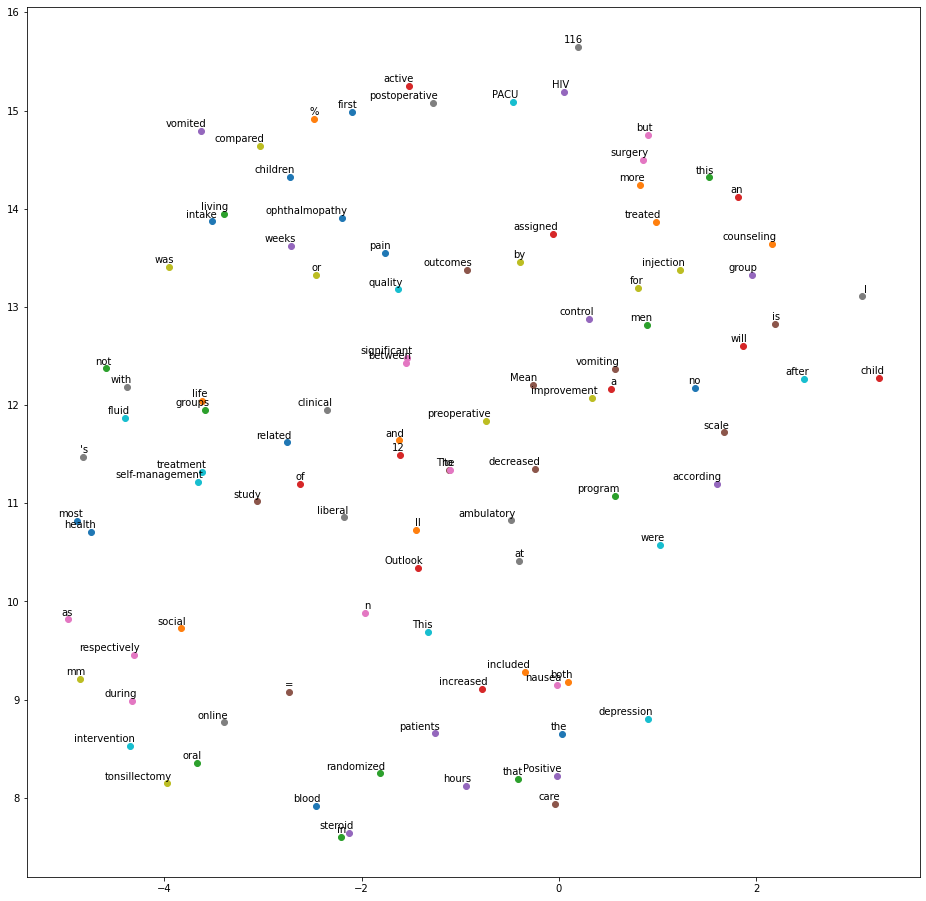

In [14]:
tsne_plot(model.wv, no_words=100)